In [1]:
import pandas as pd
df = pd.read_csv('../data/billboard.csv')
df.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
melted = pd.melt(df, id_vars=['year','artist','track','time','date.entered'],
                var_name="week",
                value_name="ratings")
melted

,year,artist,track,time,date.entered,week,ratings
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [4]:
fx = melted[['year','artist','track']]
fx.head()

,year,artist,track
0,2000,2 Pac,Baby Don't Cry (Keep...
1,2000,2Ge+her,The Hardest Part Of ...
2,2000,3 Doors Down,Kryptonite
3,2000,3 Doors Down,Loser
4,2000,504 Boyz,Wobble Wobble


In [7]:
fx = fx.drop_duplicates()
fx['id'] = range(len(fx))

In [11]:
fx

,year,artist,track,id
0,2000,2 Pac,Baby Don't Cry (Keep...,0
1,2000,2Ge+her,The Hardest Part Of ...,1
2,2000,3 Doors Down,Kryptonite,2
3,2000,3 Doors Down,Loser,3
4,2000,504 Boyz,Wobble Wobble,4
...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,312
313,2000,"Yearwood, Trisha",Real Live Woman,313
314,2000,Ying Yang Twins,Whistle While You Tw...,314
315,2000,Zombie Nation,Kernkraft 400,315


In [12]:
fx.columns

Index(['year', 'artist', 'track', 'id'], dtype='object')

In [16]:
fccp = melted.merge(fx, on=['year', 'artist', 'track'])
fccp

,year,artist,track,time,date.entered,week,ratings,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,0
1,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0,0
2,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0,0
3,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0,0
4,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0,0
...,...,...,...,...,...,...,...,...
24087,2000,matchbox twenty,Bent,4:12,2000-04-29,wk72,NaN,316
24088,2000,matchbox twenty,Bent,4:12,2000-04-29,wk73,NaN,316
24089,2000,matchbox twenty,Bent,4:12,2000-04-29,wk74,NaN,316
24090,2000,matchbox twenty,Bent,4:12,2000-04-29,wk75,NaN,316


In [ ]:
dfx = fccp.pivot_table(index=['artist','track','time','date.entered'],
              columns="week",
              values="ratings")
dfx

<Axes: xlabel='week', ylabel='ratings'>

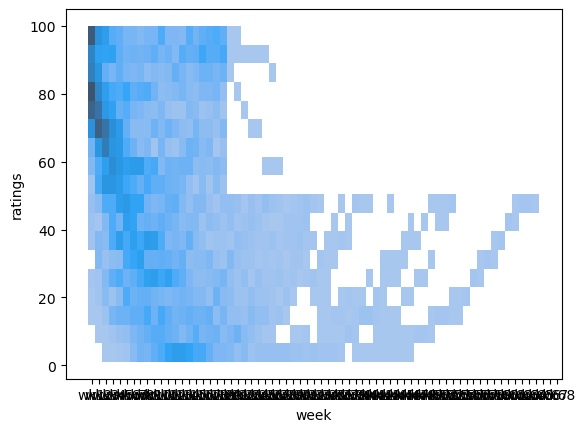

In [19]:
sns.histplot(x='week', y='ratings', data=fccp)

C:\Users\starl\AppData\Local\Temp\ipykernel_29136\3821116413.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fccp['ratings'])


<Axes: xlabel='ratings', ylabel='Density'>

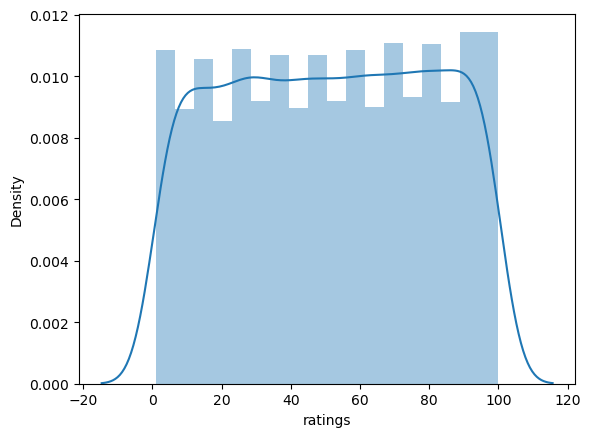

In [18]:
import seaborn as sns
sns.distplot(fccp['ratings'])